# COMP9517: Lab 3 Image Classification

### Importing Necessary Packages
First, I need to import all the necessary packages. These include numpy, pandas, matplotlib, seaborn, cv2, and several modules from sklearn.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

import os

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Defining Paths
Next, I define the paths to the CSV file and the image folder. This is essential for loading the data correctly.

In [2]:
# Paths to CSV file and image folder
csv_path = "./Chinese_MNIST_Dataset/chinese_mnist.csv"
image_folder = "./Chinese_MNIST_Dataset/data/data"

### Loading the CSV File
Load the CSV file that contains metadata about the images. This will help in linking each image with its corresponding label.

In [3]:
# Load the CSV file containing metadata about the images
data_info = pd.read_csv(csv_path)

### Loading Images
Define a function to load images based on the information in each row of the CSV file. Each image filename is constructed from the row's suite_id, sample_id, and code.

In [4]:
# Load an image based on the row information
def load_image(row):
    filename = f"input_{row['suite_id']}_{row['sample_id']}_{row['code']}.jpg"
    filepath = os.path.join(image_folder, filename)
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    return image

### Loading All Images and Labels
Use the function defined above to load all images and their corresponding labels. I also reshape the images to make them compatible with the classifiers.

In [5]:
# Load all images and corresponding labels
images = data_info.apply(load_image, axis=1).values
labels = data_info['code'].values

# Reshape images to be compatible with the classifiers
images = np.array([img.reshape(-1) for img in images])

### Evaluating Classifier Performance
Define a function to evaluate the performance of a classifier. This function calculates accuracy, precision, recall, F1 score, and the confusion matrix.

In [6]:
# Evaluate classifier performance
def evaluate_classifier(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    return acc, prec, rec, f1, conf_matrix

### Plotting the Confusion Matrix
To visualize the confusion matrix, I define a function that uses seaborn to create a heatmap.

In [7]:
# Plot confusion matrix using seaborn
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Running Experiments
Define a function to run experiments with different training sizes. The function splits the data, trains classifiers, and evaluates their performance.

In [8]:
# Run experiments
def run_experiment(train_size):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, test_size=1000, random_state=42)
    train_idx, test_idx = next(sss.split(images, labels))

    X_train, X_test = images[train_idx], images[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]

    classifiers = {
        "KNN": KNeighborsClassifier(n_neighbors=3),
        "Decision Tree": DecisionTreeClassifier(),
        "SGD": SGDClassifier(max_iter=250)
    }

    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        results[name] = evaluate_classifier(clf, X_test, y_test)
    
    return results

### Running Experiments for Different Training Sizes
The training sizes for three stages are set, and experiments are run for each stage. The results for each classifier are printed, and the confusion matrices are plotted.

Running experiment with training size: 5000

Classifier: KNN
Accuracy: 0.322
Precision: 0.5007519138790681
Recall: 0.322
F1 Score: 0.3255526671845215



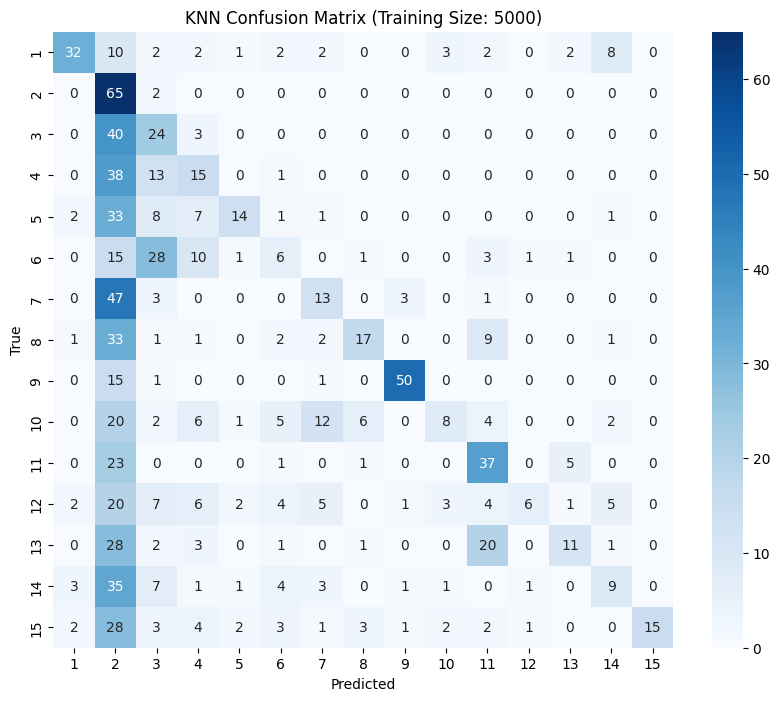


Classifier: Decision Tree
Accuracy: 0.25
Precision: 0.24979792165173395
Recall: 0.25
F1 Score: 0.24885283357564167



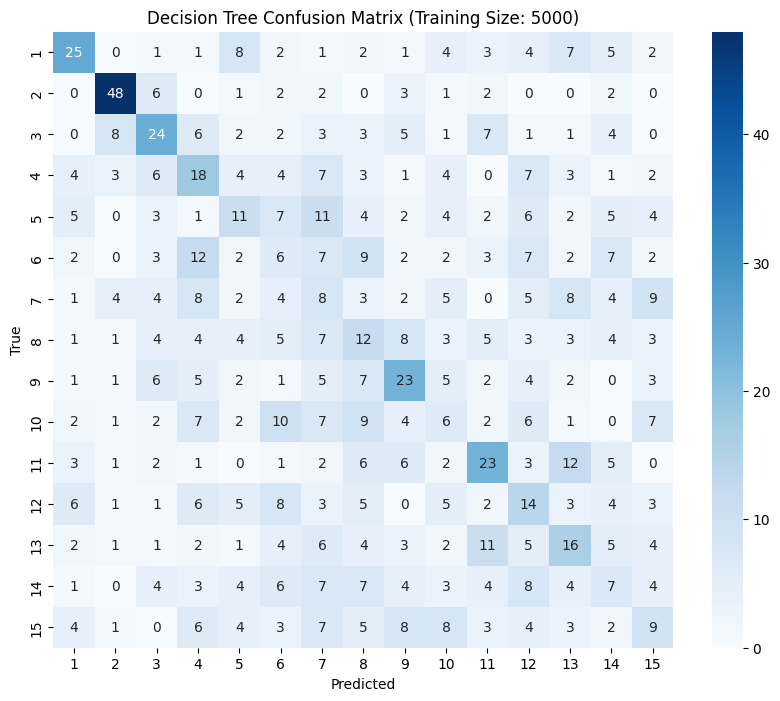


Classifier: SGD
Accuracy: 0.284
Precision: 0.2943372319063652
Recall: 0.284
F1 Score: 0.2814766434253617



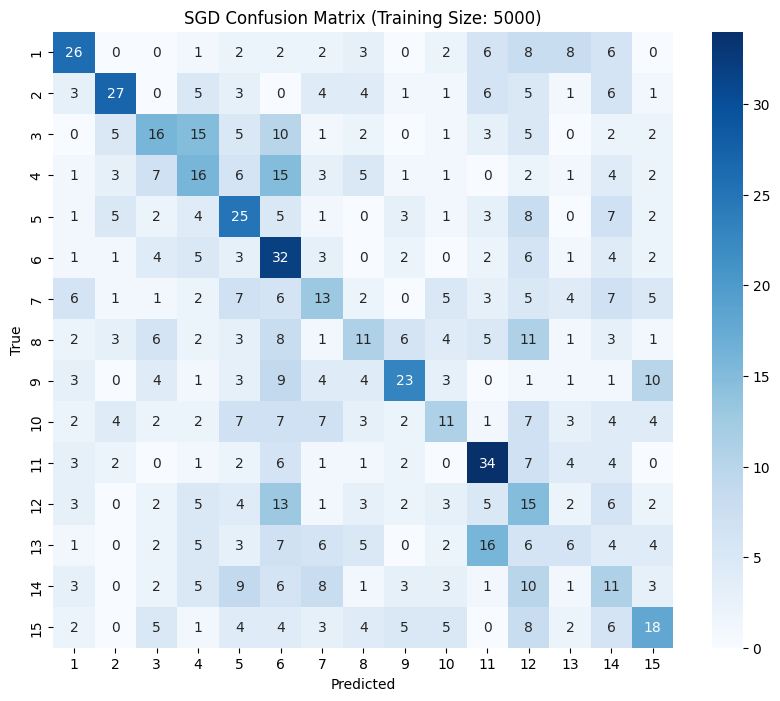

Running experiment with training size: 10000

Classifier: KNN
Accuracy: 0.412
Precision: 0.5932355464950488
Recall: 0.412
F1 Score: 0.42471063245264096



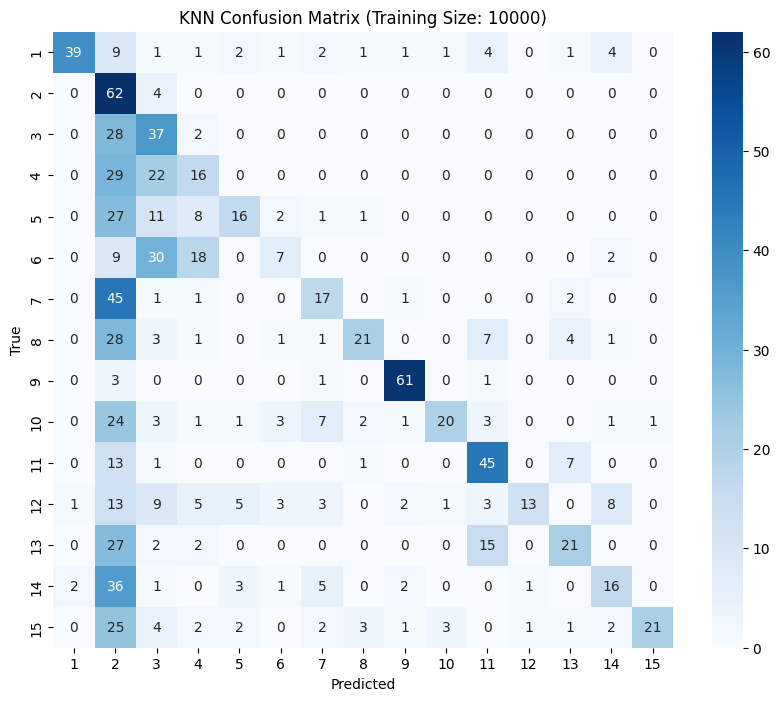


Classifier: Decision Tree
Accuracy: 0.315
Precision: 0.3158121666287261
Recall: 0.315
F1 Score: 0.31257646538591255



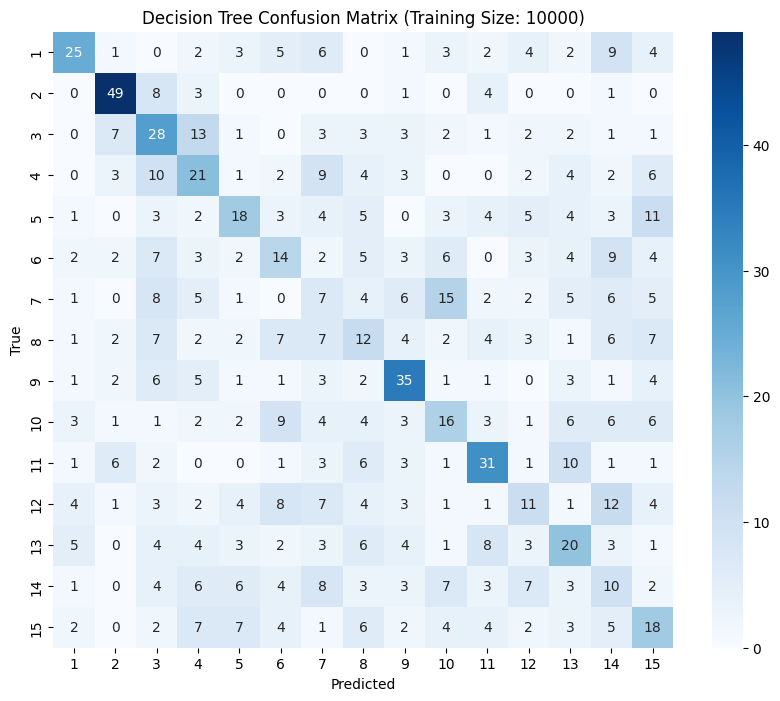


Classifier: SGD
Accuracy: 0.318
Precision: 0.3232603226869714
Recall: 0.318
F1 Score: 0.3179879880987246



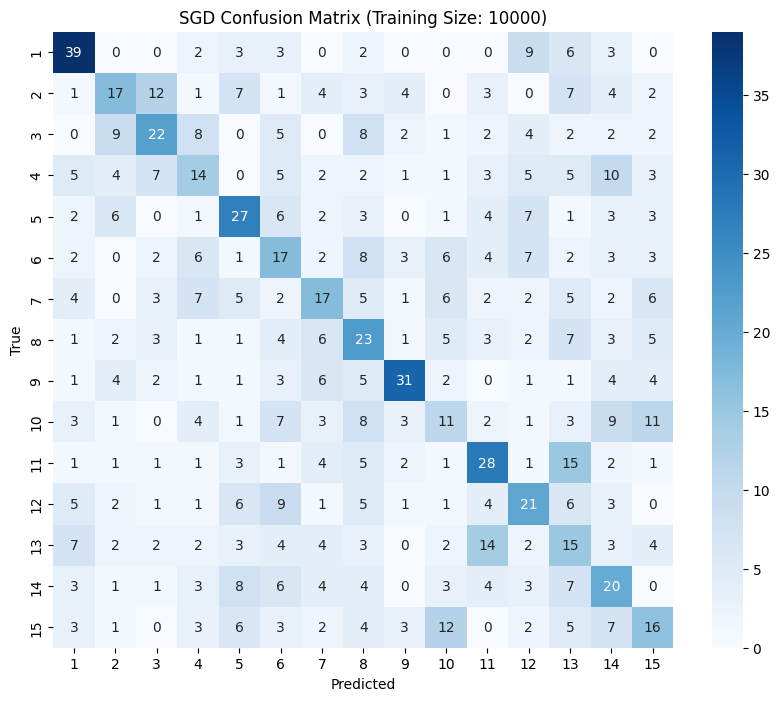

Running experiment with training size: 14000

Classifier: KNN
Accuracy: 0.473
Precision: 0.6243495697350306
Recall: 0.473
F1 Score: 0.484196625333029



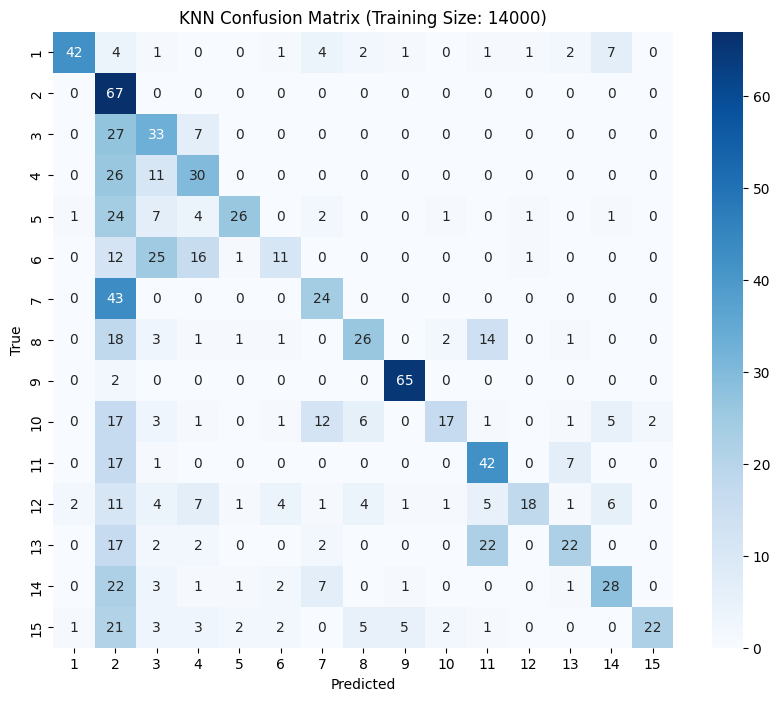


Classifier: Decision Tree
Accuracy: 0.343
Precision: 0.3417057295232417
Recall: 0.343
F1 Score: 0.34067911456172983



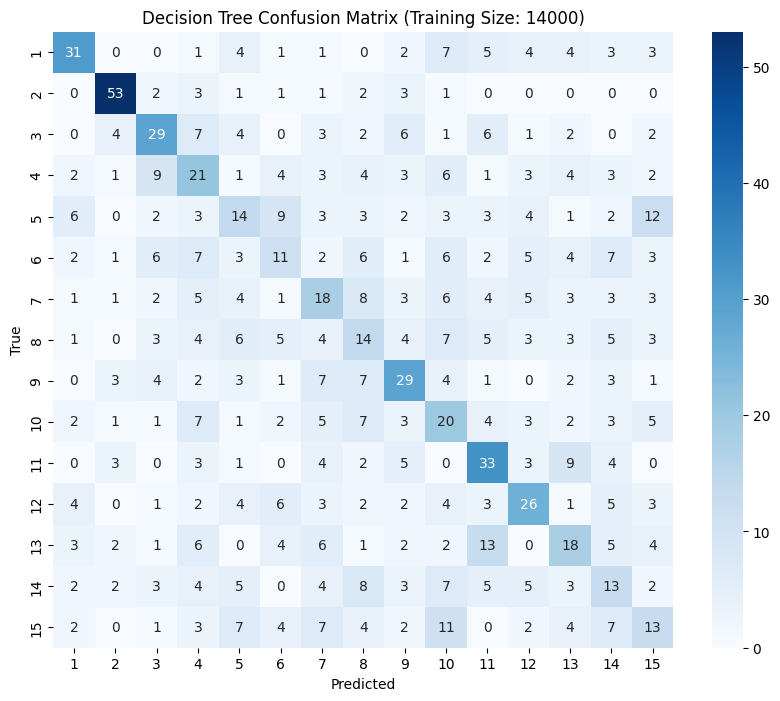


Classifier: SGD
Accuracy: 0.318
Precision: 0.3506817010521374
Recall: 0.318
F1 Score: 0.31961515052542633



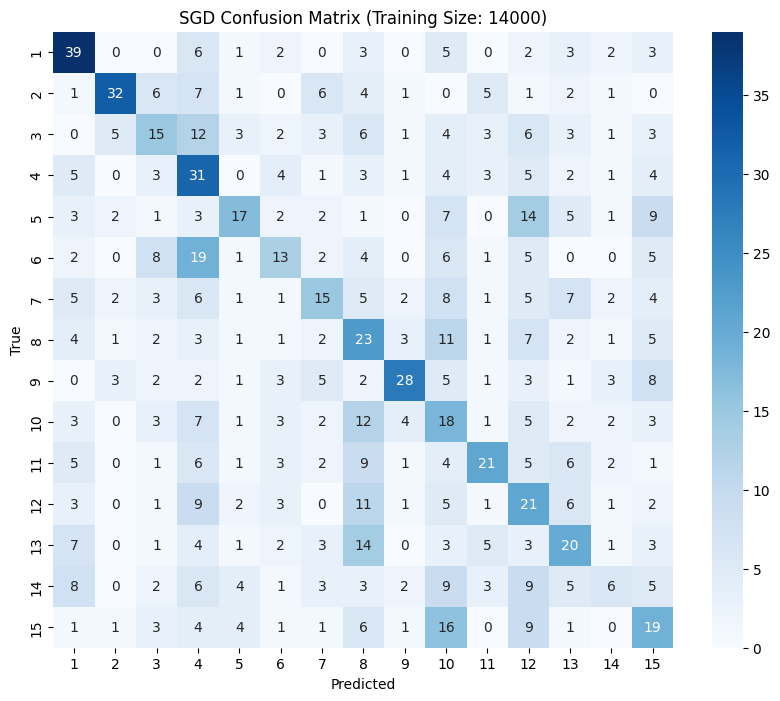

In [9]:
# Define training sizes for three stages
training_sizes = [5000, 10000, 14000]

# Run experiments for each stage
for size in training_sizes:
    print(f"Running experiment with training size: {size}")
    results = run_experiment(size)
    for clf_name, metrics in results.items():
        acc, prec, rec, f1, conf_matrix = metrics
        print(f"\nClassifier: {clf_name}")
        print(f"Accuracy: {acc}")
        print(f"Precision: {prec}")
        print(f"Recall: {rec}")
        print(f"F1 Score: {f1}\n")
        plot_confusion_matrix(conf_matrix, f"{clf_name} Confusion Matrix (Training Size: {size})")

### Conclusion

In this lab, image classification was performed on the Chinese MNIST dataset using three different classifiers: K-Nearest Neighbors (KNN), Decision Tree (DT), and Stochastic Gradient Descent (SGD). The experiment was conducted in three stages with varying training set sizes: 5000, 10000, and 14000 images, while keeping the test set size fixed at 1000 images.

**Key Observations:**

1. **Performance Metrics**:
   - **KNN Classifier**:
     - With 5000 training images, the KNN classifier achieved an accuracy of 32.2%, a precision of 50.08%, a recall of 32.2%, and an F1 score of 32.55%.
     - With 10000 training images, the accuracy increased to 41.2%, the precision to 59.32%, the recall to 41.2%, and the F1 score to 42.47%.
     - With 14000 training images, the accuracy further improved to 47.3%, the precision to 62.43%, the recall to 47.3%, and the F1 score to 48.42%.
   - **Decision Tree Classifier**:
     - With 5000 training images, the Decision Tree classifier had an accuracy of 25%, a precision of 24.98%, a recall of 25%, and an F1 score of 24.88%.
     - With 10000 training images, the accuracy improved to 31.5%, the precision to 31.58%, the recall to 31.5%, and the F1 score to 31.26%.
     - With 14000 training images, the accuracy was 34.3%, the precision was 34.17%, the recall was 34.3%, and the F1 score was 34.07%.
   - **SGD Classifier**:
     - With 5000 training images, the SGD classifier had an accuracy of 28.4%, a precision of 29.43%, a recall of 28.4%, and an F1 score of 28.15%.
     - With 10000 training images, the accuracy improved to 31.8%, the precision to 32.33%, the recall to 31.8%, and the F1 score to 31.80%.
     - With 14000 training images, the accuracy was stable at 31.8%, the precision improved to 35.07%, the recall remained at 31.8%, and the F1 score was 31.96%.

2. **Impact of Increasing the Training Set Size**:
   - **5000 Training Images**: At this stage, the classifiers had baseline performance. The KNN classifier performed the best among the three, while the Decision Tree and SGD classifiers showed lower performance.
   - **10000 Training Images**: As the training set size increased to 10000, there was a noticeable improvement in the performance metrics for all classifiers. The additional data helped the classifiers to learn better and generalize more effectively.
   - **14000 Training Images**: Further increasing the training set size to 14000 images resulted in additional performance gains. The KNN classifier benefited the most from the larger dataset, showing the highest improvements in all metrics. The Decision Tree and SGD classifiers also showed improvements, though to a lesser extent.

**Conclusion**:
Increasing the training set size generally leads to better classifier performance. This improvement is due to the increased amount of data available for the classifiers to learn from, which enhances their ability to generalize to new, unseen data. Among the three classifiers tested, KNN consistently performed well across different training set sizes, showing significant improvements with more data. The Decision Tree and SGD classifiers also improved with larger datasets, but their performance was less consistent compared to KNN.

The experiment highlights the importance of having a sufficiently large and representative training dataset to achieve high classification accuracy and reliable performance in machine learning tasks.